# Computer Inverter model example

In [1]:
import os, sys

In [2]:
ROOT_PATH = os.getenv("PROJECT_HOME")

In [3]:
sys.path.append(ROOT_PATH)

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
from smartgrid.microgrid.inverter import ares_load, ares_preprocessing, fit_inverter_spline, save_pp_inverter
import glob

## Loading ARES data sample

In [6]:
FILES = ["../data/ARES-Export_2017-01-13_-_02.00.zip", "../data/ARES-Export_2017-01-14_-_02.00.zip"]
#FILES = glob.glob("/tmp/ARES/*.zip")

In [7]:
ares = ares_load(FILES)

In [15]:
ares.tail()

,puissanceAllumage6,puissanceAux,puissanceAllumage3,puissanceAllumage5,puissanceAllumage1,puissanceAllumage2,puissanceBorneC,puissanceEclairage,puissanceBorneB,puissanceSmaC,...,DCCInput1I,DCCInput1P,DCCInput2V,DCCInput2I,DCCInput2P,ACCP,ACCQ,ACCS,cosphiC,freqC
date,,,,,,,,,,,,,,,,,,,,,
2017-01-14 00:57:36,0.0,0.524444,0.0,0.0,0.0,0.0,0.014990,0.012717,0.000000,4.294967e+09,...,-2147483.75,-2147483648,-21474836.0,-2147483.75,-2.147484e+09,2147483.75,-2.147484e+09,-2147483648,1.0,-0.01
2017-01-14 00:58:32,0.0,0.524444,0.0,0.0,0.0,0.0,0.014620,0.012717,0.010791,4.294967e+09,...,-2147483.75,-2147483648,-21474836.0,-2147483.75,-2.147484e+09,2147483.75,-2.147484e+09,-2147483648,1.0,-0.01
2017-01-14 00:58:36,0.0,0.525277,0.0,0.0,0.0,0.0,0.014620,0.012505,0.010791,4.294967e+09,...,-2147483.75,-2147483648,-21474836.0,-2147483.75,-2.147484e+09,2147483.75,-2.147484e+09,-2147483648,1.0,-0.01
2017-01-14 00:59:32,0.0,0.525277,0.0,0.0,0.0,0.0,0.013953,0.012505,0.010678,4.294967e+09,...,-2147483.75,-2147483648,-21474836.0,-2147483.75,-2.147484e+09,2147483.75,-2.147484e+09,-2147483648,1.0,-0.01
2017-01-14 00:59:36,0.0,0.525112,0.0,0.0,0.0,0.0,0.013953,0.012472,0.010678,4.294967e+09,...,-2147483.75,-2147483648,-21474836.0,-2147483.75,-2.147484e+09,2147483.75,-2.147484e+09,-2147483648,1.0,-0.01


## Load & save function

In [9]:
save_pp_inverter(ares, "data/models/ppInverterTest.pk")

## Preprocessing

In [9]:
ndf = ares_preprocessing(ares)

In [10]:
ares.shape, ndf.shape

((5765, 67), (976, 7))

In [11]:
ndf.head()

,I1,V1,P1,I2,V2,P2,Pac
date,,,,,,,
2017-01-12 10:15:00,9.196,549.219971,5.050,8.836,548.619995,4.846,9.765
2017-01-12 10:16:00,8.754,549.219971,4.806,8.498,545.460022,4.632,9.308
2017-01-12 10:17:00,8.478,545.950012,4.627,8.164,545.340027,4.451,8.956
2017-01-12 10:18:00,8.348,545.950012,4.555,8.033,545.489990,4.381,8.814
2017-01-12 10:19:00,8.202,546.059998,4.478,7.903,545.340027,4.309,8.660


## Inverter PV fitting

In [12]:
ppOnduleurPV, breaks = fit_inverter_spline(ndf)

In [13]:
ppOnduleurPV(breaks)

array([0.78536369, 0.80035996, 0.81471721, 0.8284478 , 0.84156405,
       0.85407829, 0.86600285, 0.87735008, 0.88813229, 0.89836183,
       0.90805103, 0.91721221, 0.92585772, 0.93399988, 0.94165103,
       0.9488235 , 0.95552962, 0.96178173, 0.96759216, 0.97297324,
       0.9779373 , 0.98249668, 0.99670684, 1.00562643, 1.00999933,
       1.01056942, 1.0080806 , 1.00327672, 0.9969017 , 0.9896994 ,
       0.9824137 , 0.9757885 , 0.97056767, 0.9674951 , 0.96731467,
       0.97077027, 0.97860577, 0.99156506, 1.01039203, 1.03583055,
       1.0686245 , 1.10951778])

In [34]:
m, b = fit_inverter_spline(ndf.head(), num=2)

In [35]:
b

array([8.787 , 5.8935, 3.    , 9.896 ])

In [36]:
m(b)

array([ 0.98555534,  0.62713372, -1.24905077,  0.986763  ])

## Raw stats 

In [17]:
puiss_rendement = pd.DataFrame(index=ndf.index, data=dict(Puissance=ndf.P2 + ndf.P1,
                                                          Rendement=ndf.Pac / (ndf.P1 + ndf.P2)))

In [18]:
puiss_rendement = puiss_rendement.sort_values(["Puissance"])

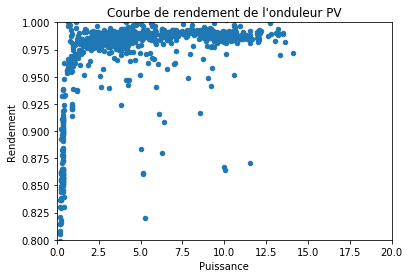

In [19]:
puiss_rendement.plot(x="Puissance", y="Rendement", 
                     kind="scatter",
                     xlim=[0, 20], ylim=[0.8, 1],
                     title="Courbe de rendement de l'onduleur PV")

## From computed model

In [20]:
import numpy as np

In [21]:
X2 = np.arange(0, 20, 0.01)

In [22]:
y_estimation = ppOnduleurPV(breaks)

In [23]:
y_estimation2 = ppOnduleurPV(X2)

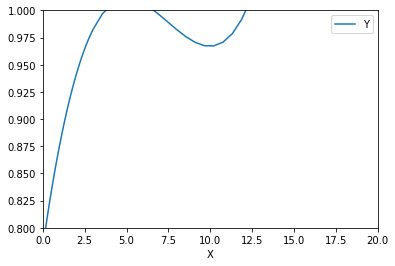

In [24]:
pd.DataFrame(data=dict(X=breaks, Y=y_estimation)).plot(x="X", y="Y", xlim=[0, 20], ylim=[0.8, 1],)

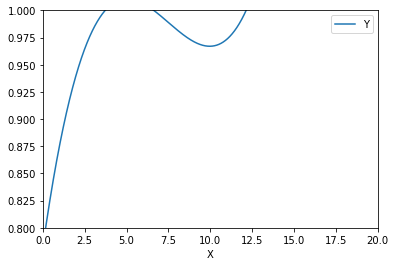

In [25]:
pd.DataFrame(data=dict(X=X2, Y=y_estimation2)).plot(x="X", y="Y", xlim=[0, 20], ylim=[0.8, 1],)

In [26]:
ppOnduleurPV